### FILTROS DE REALCE: 
- Objetivo: 
    Realzar los detalles de una imagen que hayan podido quedar emborronados. 
    
- Estos filtros están asociados, por tanto, con la detección de lados o bordes. 
- La idea que subyace en la mayor parte de las técnicas de detección de bordes es el cálculo de un operador local de derivación ya que un píxel pertenece a un borde si se produce un cambio brusco entre niveles de grises con sus vecinos. 
        - Mientras más brusco sea el cambio, más fácil es detectar el borde. 
        - Inconveniente: El ruido es colateralmente realzado.


### Filtros de Borde Fundamentales:

-Sobel

-Laplaciano

-Canny

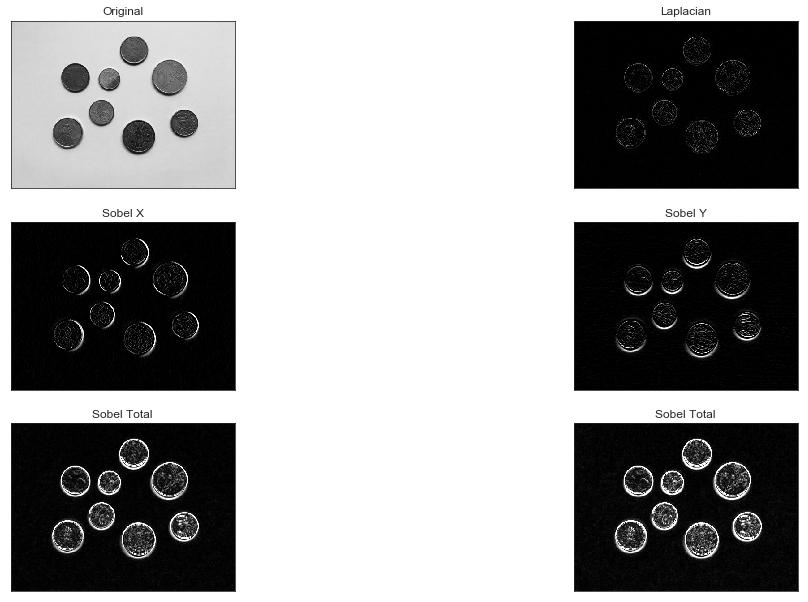

In [9]:
%matplotlib inline

import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("white")


imga = cv2.imread('monedas.jpg')
img = cv2.cvtColor(imga, cv2.COLOR_BGR2GRAY)

sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3) # 1 0 indica sentido x, ksize: tamaño kernel
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3) # 0 1 indica sentido y, ksize: tamaño kernel

laplacian = cv2.Laplacian(img, cv2.CV_64F)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.subplot(3,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(3,2,2)
plt.imshow(laplacian, cmap='gray', vmin=0, vmax=255)
plt.title('Laplacian')
plt.xticks([])
plt.yticks([])

plt.subplot(3,2,3),
plt.imshow(sobelx, cmap='gray', vmin=0, vmax=255)
plt.title('Sobel X')
plt.xticks([])
plt.yticks([])

plt.subplot(3,2,4)
plt.imshow(sobely, cmap='gray', vmin=0, vmax=255)
plt.title('Sobel Y')
plt.xticks([])
plt.yticks([])

plt.subplot(3,2,5)
plt.imshow(np.sqrt((sobelx*sobelx + sobely*sobely)), cmap='gray', vmin=0, vmax=255)
plt.title('Sobel Total')
plt.xticks([])
plt.yticks([])

plt.subplot(3,2,6)
plt.imshow(abs(sobelx) + abs(sobely), cmap='gray', vmin=0, vmax=255)
plt.title('Sobel Total')
plt.xticks([])
plt.yticks([])

plt.show()

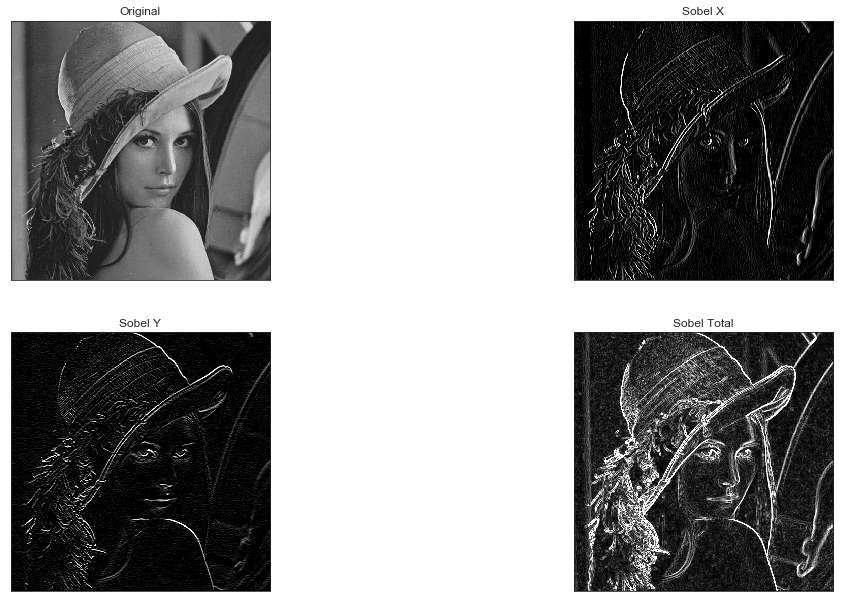

In [10]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('lenna.jpg', 0)
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3) # 1 0 indica sentido x ksize: tamaño kernel
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3) # 0 1 indica sentido y
sobelt = abs(sobelx) + abs(sobely)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,2)
plt.imshow(sobelx, cmap='gray', vmin=0, vmax=255)
plt.title('Sobel X')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,3)
plt.imshow(sobely, cmap='gray', vmin=0, vmax=255)
plt.title('Sobel Y')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,4)
plt.imshow(sobelt, cmap='gray', vmin=0, vmax=255)
plt.title('Sobel Total')
plt.xticks([])
plt.yticks([])

plt.show()

### Filtro de Canny

Ingrese umbral inferior:  50
Ingrese umbral superior:  200


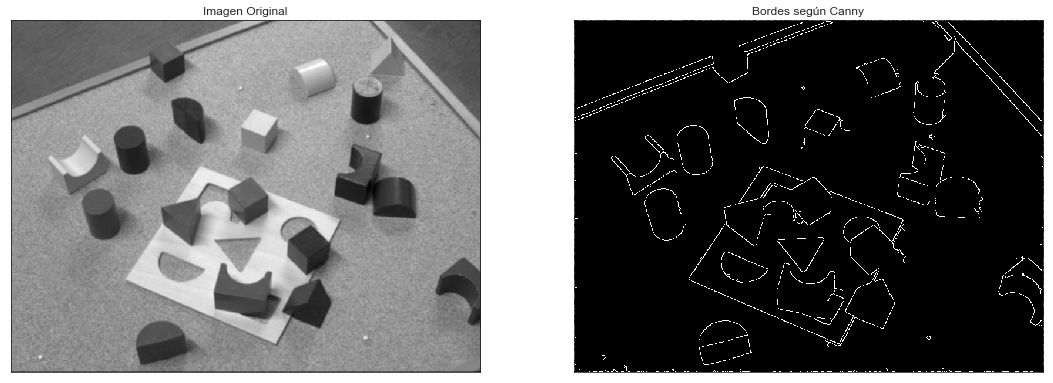

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('puzzle.png', 0)
umbrali = int(input('Ingrese umbral inferior: ')) # Por ejemplo 80 y 130
umbrals = int(input('Ingrese umbral superior: '))
edges = cv2.Canny(img, umbrali, umbrals)
# Observar lo que sucede al variar los umbrales
# Como ejemplo puede ingresar umbral inferior=50 y umbral superior=200

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Bordes según Canny')
plt.xticks([])
plt.yticks([])
 
plt.show()

**Ejercicio**
Elegir una imagen.

Aplicarle suavizado gaussiano y luego el filtro laplaciano (LoG)

Repetir el ejercicio anterior, pero agregue ruido a la imagen antes de operar.

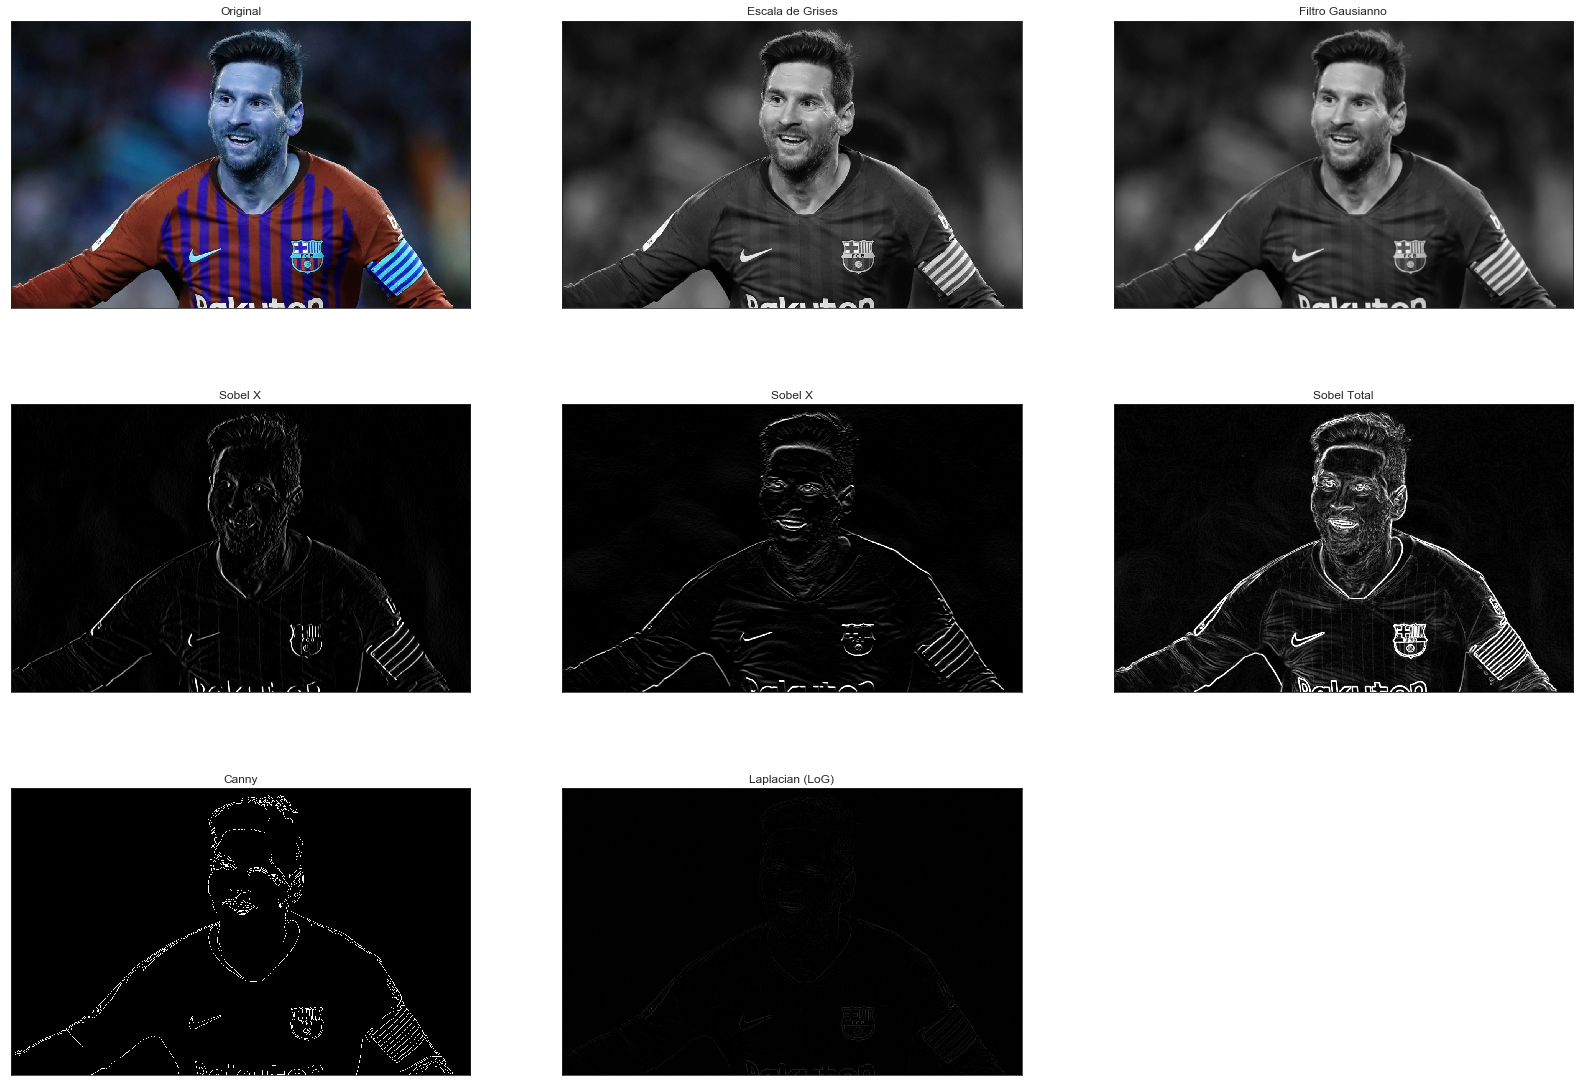

In [31]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

img = cv2.imread('messi.jpg') # Carga la imagen como numpy de uint8
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convierte en escala de grises
img_blur = cv2.GaussianBlur(img_gray, (5,5), 0)  # Matriz tamaño 5 para Filtro Gausianno (numero impar y positivo)

img_sobelx = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3) # 1 0 indica sentido x ksize: tamaño kernel
img_sobely = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3) # 0 1 indica sentido y
img_sobelt = abs(img_sobelx) + abs(img_sobely)

img_edges = cv2.Canny(img_blur, 50, 200)  # Filtro Canny
img_laplacian = cv2.Laplacian(img_blur, cv2.CV_64F)  # Filtro Laplaciano (LoG)

fig = plt.gcf()
fig.set_size_inches(28, 20)

plt.subplot(3,3,1)
plt.imshow(img)
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(3,3,2)
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)
plt.title('Escala de Grises')
plt.xticks([])
plt.yticks([])

plt.subplot(3,3,3),
plt.imshow(img_blur, cmap='gray', vmin=0, vmax=255)
plt.title('Filtro Gausianno')
plt.xticks([])
plt.yticks([])

plt.subplot(3,3,4),
plt.imshow(img_sobelx, cmap='gray', vmin=0, vmax=255)
plt.title('Sobel X')
plt.xticks([])
plt.yticks([])

plt.subplot(3,3,5),
plt.imshow(img_sobely, cmap='gray', vmin=0, vmax=255)
plt.title('Sobel X')
plt.xticks([])
plt.yticks([])

plt.subplot(3,3,6),
plt.imshow(img_sobelt, cmap='gray', vmin=0, vmax=255)
plt.title('Sobel Total')
plt.xticks([])
plt.yticks([])

plt.subplot(3,3,7),
plt.imshow(img_edges, cmap='gray', vmin=0, vmax=255)
plt.title('Canny')
plt.xticks([])
plt.yticks([])

plt.subplot(3,3,8),
plt.imshow(img_laplacian, cmap='gray', vmin=0, vmax=255)
plt.title('Laplacian (LoG)')
plt.xticks([])
plt.yticks([])

plt.show()

In [26]:
import numpy as np 
import random 
import cv2 

def sp_noise(image, prob, thres):
    """
    Agregar ruido salt and pepper noise a una imagen 
    prob = probabilidad del ruido 
    """
    output = np.zeros(image.shape, np.uint8) 
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random() # Devuelve flotante entre 0.0 y 1.
            if rdn < prob:
                output[i][j] = 0 
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

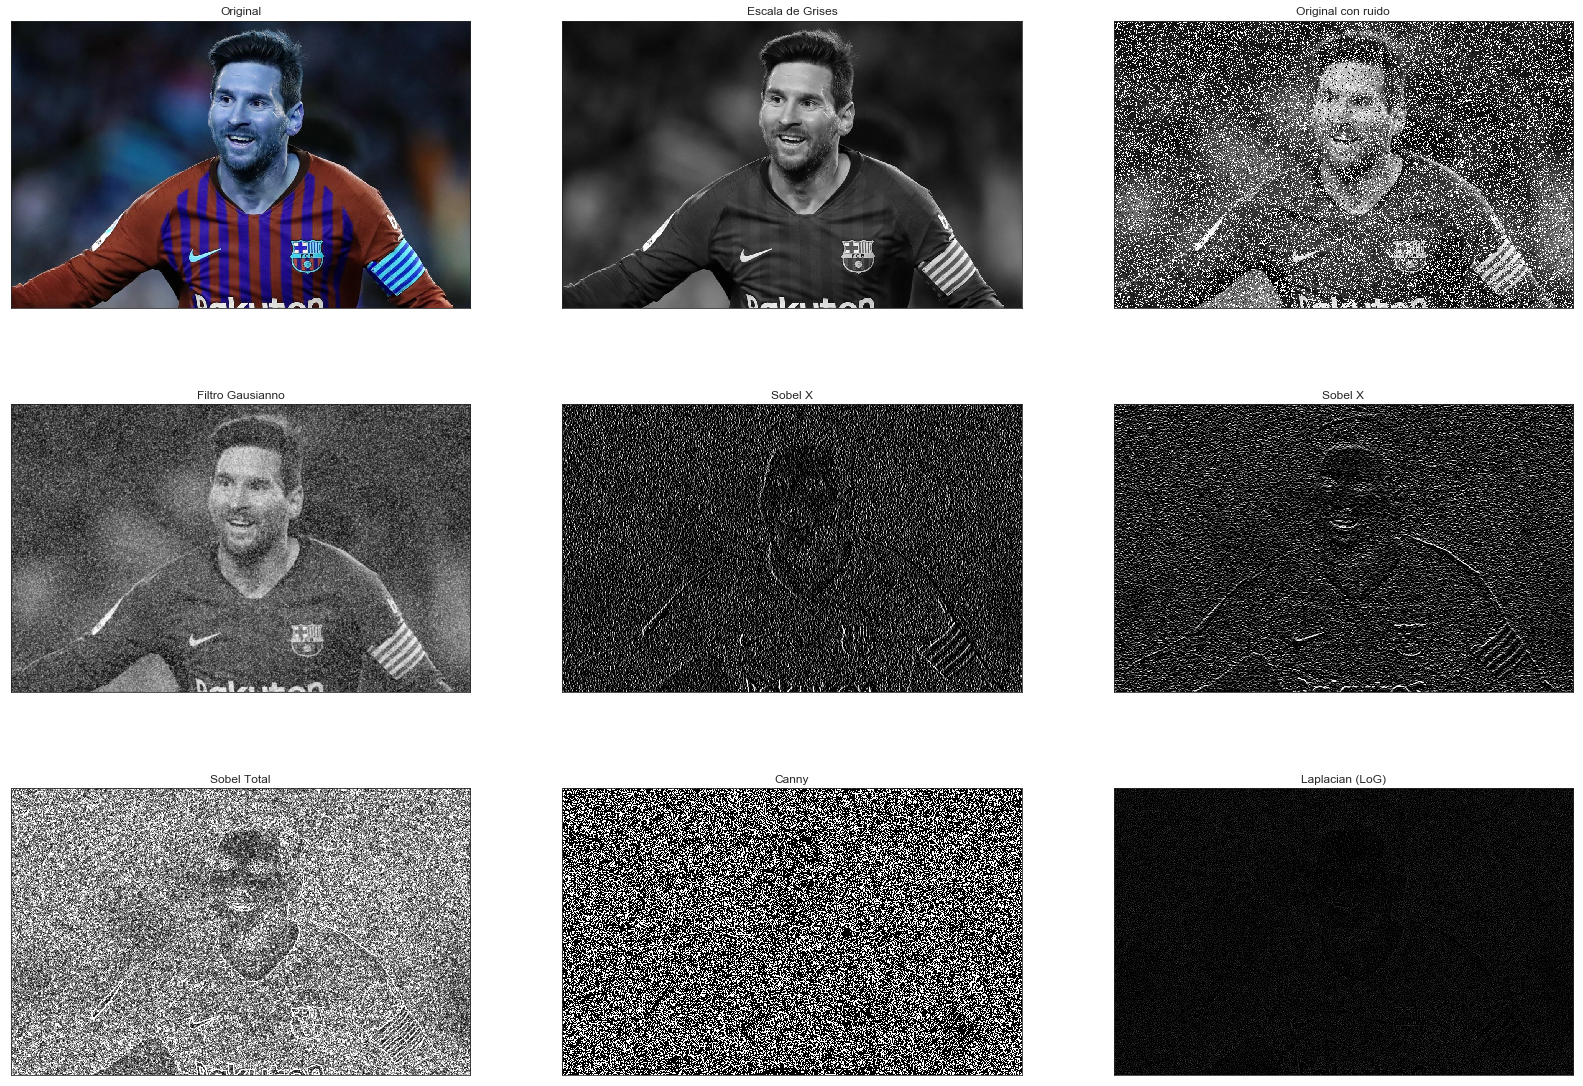

In [32]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

img = cv2.imread('messi.jpg') # Carga la imagen como numpy de uint8
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convierte en escala de grises
img_noise = sp_noise(img_gray, 0.05, 0.8) # Prob = 5% Ruido = 8%

img_blur = cv2.GaussianBlur(img_noise, (5,5), 0)  # Matriz tamaño 5 para Filtro Gausianno (numero impar y positivo)

img_sobelx = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3) # 1 0 indica sentido x ksize: tamaño kernel
img_sobely = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3) # 0 1 indica sentido y
img_sobelt = abs(img_sobelx) + abs(img_sobely)

img_edges = cv2.Canny(img_blur, 50, 200)  # Filtro Canny
img_laplacian = cv2.Laplacian(img_blur, cv2.CV_64F)  # Filtro Laplaciano (LoG)

fig = plt.gcf()
fig.set_size_inches(28, 20)

plt.subplot(3,3,1)
plt.imshow(img)
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(3,3,2)
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)
plt.title('Escala de Grises')
plt.xticks([])
plt.yticks([])

plt.subplot(3,3,3)
plt.imshow(img_noise, cmap='gray', vmin=0, vmax=255)
plt.title('Original con ruido')
plt.xticks([])
plt.yticks([])

plt.subplot(3,3,4),
plt.imshow(img_blur, cmap='gray', vmin=0, vmax=255)
plt.title('Filtro Gausianno')
plt.xticks([])
plt.yticks([])

plt.subplot(3,3,5),
plt.imshow(img_sobelx, cmap='gray', vmin=0, vmax=255)
plt.title('Sobel X')
plt.xticks([])
plt.yticks([])

plt.subplot(3,3,6),
plt.imshow(img_sobely, cmap='gray', vmin=0, vmax=255)
plt.title('Sobel X')
plt.xticks([])
plt.yticks([])

plt.subplot(3,3,7),
plt.imshow(img_sobelt, cmap='gray', vmin=0, vmax=255)
plt.title('Sobel Total')
plt.xticks([])
plt.yticks([])

plt.subplot(3,3,8),
plt.imshow(img_edges, cmap='gray', vmin=0, vmax=255)
plt.title('Canny')
plt.xticks([])
plt.yticks([])

plt.subplot(3,3,9),
plt.imshow(img_laplacian, cmap='gray', vmin=0, vmax=255)
plt.title('Laplacian (LoG)')
plt.xticks([])
plt.yticks([])

plt.show()